In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
from fbprophet import Prophet
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_revenue = pd.read_excel('ciro.xlsx')
euro_revenue = df_revenue['EUR_Revenue']

In [8]:
df_train = df_revenue.iloc[0:36, 0:2]
df_train.columns = ['ds', 'y']
df_test = df_revenue.iloc[36:, 0:2]
df_test.columns = ['ds', 'y']

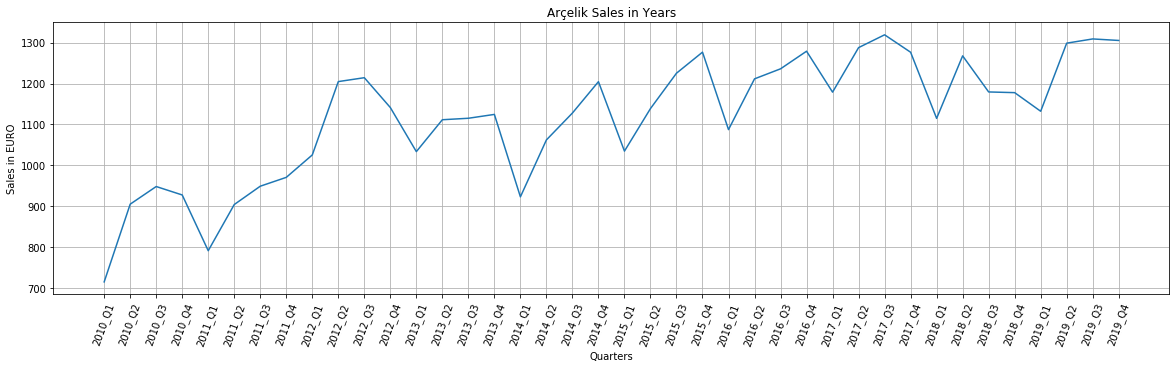

In [11]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(df_revenue['Date'], df_revenue['EUR_Revenue'])

ax.set(xlabel='Quarters', ylabel='Sales in EURO',
       title='Arçelik Sales in Years')
plt.xticks(rotation=70)
ax.grid()
#fig.savefig("test.png")
fig.show()

In [20]:
df = pd.DataFrame({'ds': pd.date_range(start='01/01/2010', end='31/10/2018', freq = '3M'), 'y': df_train['y'].values})

In [35]:
m = Prophet(weekly_seasonality=False) #, growth = 'logistic')
m.add_seasonality(name='3M', period=4, fourier_order=10)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods=4, freq = '3M')
future = future.tail(4)

In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-31,1127.690268,1071.327658,1182.853216
1,2019-04-30,1347.367046,1291.474428,1408.177031
2,2019-07-31,1394.819738,1337.979251,1452.540463
3,2019-10-31,1418.736065,1359.196553,1477.095116


In [43]:
abs(forecast['yhat'].sum() - df_test['y'].sum()) / forecast['yhat'].sum()*100

4.608261407400457

- Baseline model resulted in 4.60 % MPE

#### Adding additional regressors

In [44]:
path = "D:/Users/26029329/Desktop/Retail Analytics Hackathon/Ferhat_Data/Final Tables/"

In [45]:
df_doviz = pd.read_excel(path + "Doviz.xlsx")

In [48]:
df_doviz

,CURRENCY_DATE,CURRENCY_CODE,EXCH_PARITY_EUR,EXCH_BUY_RATE
0,2020-12-02,USD,0.916254,6.0271
1,2020-12-02,EUR,1.000000,6.5777
2,2020-11-02,USD,0.913242,5.9951
3,2020-11-02,EUR,1.000000,6.5644
4,2020-10-02,EUR,1.000000,6.5518
...,...,...,...,...
7385,2010-03-01,EUR,1.000000,2.1427
7386,2010-02-01,EUR,1.000000,2.1427
7387,2010-02-01,USD,0.694155,1.4873
7388,2010-01-01,USD,0.694155,1.4873


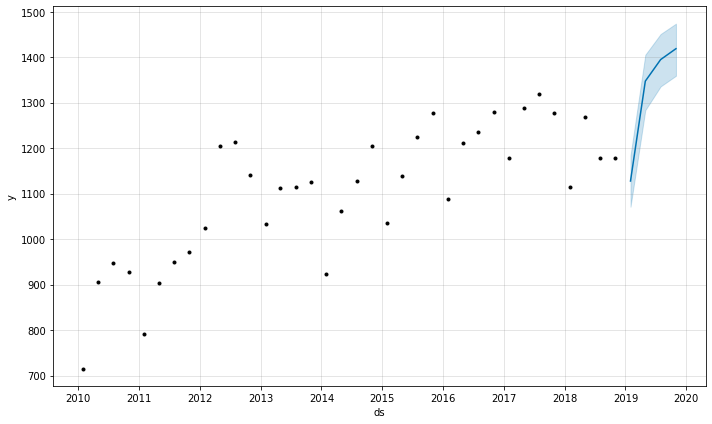

In [32]:
fig1 = m.plot(forecast)

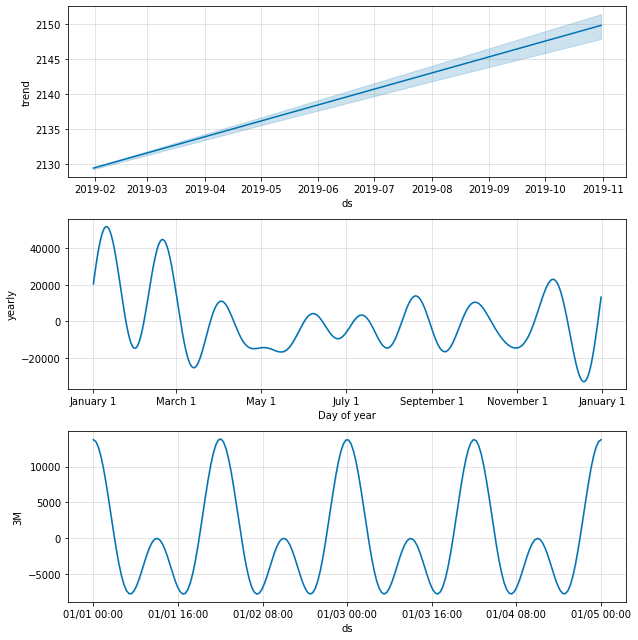

In [33]:
fig2 = m.plot_components(forecast)

### Sklearn TimeSeriesSplit

In [49]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 1 2 3 4 5 6] TEST: [ 7  8  9 10 11 12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13 14 15 16 17 18]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] TEST: [19 20 21 22 23 24]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24] TEST: [25 26 27 28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33 34 35 36]


In [3]:
df = pd.read_excel('BIST100_Data.xlsx')

In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [10]:
df.columns = ['ds', 'y']

In [25]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods=365)
future = future.tail(365)

In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,2021-02-08,141501.648643,101146.950409,183911.162596
361,2021-02-09,141469.024482,101628.100617,184137.942828
362,2021-02-10,141366.607277,100614.544237,184720.077351
363,2021-02-11,141370.338951,101019.206286,183956.937327
364,2021-02-12,141315.822013,101231.782385,183652.347949


In [28]:
df.tail()

,ds,y
1865,2020-02-09,121015.14
1866,2020-02-10,118341.52
1867,2020-02-11,119797.82
1868,2020-02-12,120048.74
1869,2020-02-13,120540.53


In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-14,112801.691120,116091.690896,123791.000265,112801.691120,112801.691120,7006.661888,7006.661888,7006.661888,6.889982,6.889982,6.889982,6999.771905,6999.771905,6999.771905,0.0,0.0,0.0,119808.353008
1,2020-02-15,112860.462662,116199.542339,123636.446536,112860.462662,112860.462662,6905.978897,6905.978897,6905.978897,-13.202769,-13.202769,-13.202769,6919.181666,6919.181666,6919.181666,0.0,0.0,0.0,119766.441560
2,2020-02-16,112919.234205,115961.024455,123482.573872,112919.234205,112919.234205,6818.334974,6818.334974,6818.334974,-32.503780,-32.503780,-32.503780,6850.838754,6850.838754,6850.838754,0.0,0.0,0.0,119737.569178
3,2020-02-17,112978.005747,116132.222540,123723.262371,112978.005747,112978.005747,6814.356961,6814.356961,6814.356961,17.867251,17.867251,17.867251,6796.489710,6796.489710,6796.489710,0.0,0.0,0.0,119792.362708
4,2020-02-18,113036.777289,115719.001731,123490.704026,113036.777289,113036.777289,6785.989648,6785.989648,6785.989648,28.568416,28.568416,28.568416,6757.421232,6757.421232,6757.421232,0.0,0.0,0.0,119822.766937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-02-08,133959.446341,101146.950409,183911.162596,93785.858105,175940.337472,7542.202302,7542.202302,7542.202302,17.867251,17.867251,17.867251,7524.335051,7524.335051,7524.335051,0.0,0.0,0.0,141501.648643
361,2021-02-09,134018.217883,101628.100617,184137.942828,93776.927237,176204.550038,7450.806599,7450.806599,7450.806599,28.568416,28.568416,28.568416,7422.238183,7422.238183,7422.238183,0.0,0.0,0.0,141469.024482
362,2021-02-10,134076.989426,100614.544237,184720.077351,93717.300427,176468.762605,7289.617851,7289.617851,7289.617851,-28.115689,-28.115689,-28.115689,7317.733540,7317.733540,7317.733540,0.0,0.0,0.0,141366.607277
363,2021-02-11,134135.760968,101019.206286,183956.937327,93545.370781,176732.241480,7234.577983,7234.577983,7234.577983,20.496588,20.496588,20.496588,7214.081394,7214.081394,7214.081394,0.0,0.0,0.0,141370.338951


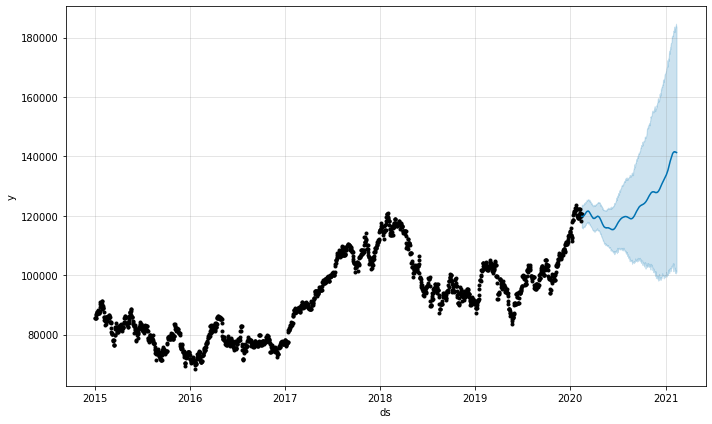

In [30]:
fig1 = m.plot(forecast)

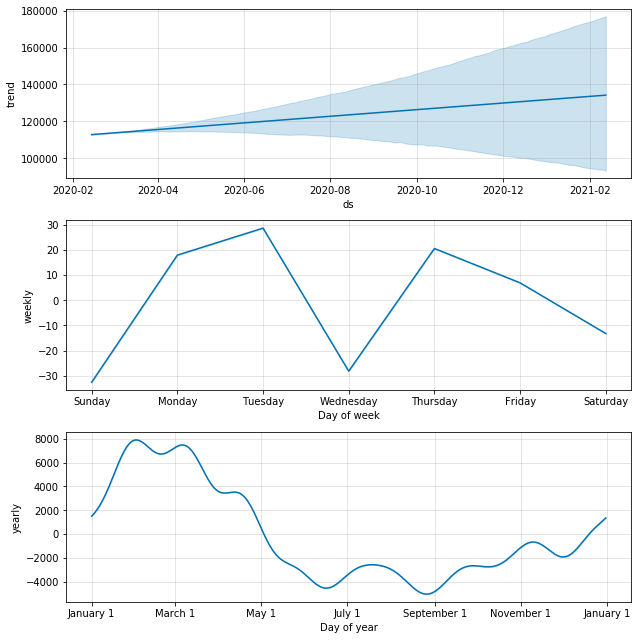

In [31]:
fig2 = m.plot_components(forecast)